<a href="https://colab.research.google.com/github/AAAA75/Python_Data_Analytics_Fall_23/blob/main/Medicare_Monthly_Enrollment_CAPSTONE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CAPSTONE PROJECT- Due Date 01/18/23: Exploratory and Comparative Analysis: "Medicare Open Enrollment" Data **Python Fall 2023-Imran Khan
Jasmin Benjamin

• Describe your motivation for performing this analysis. • Describe your data sources. • Project includes multiple data transformations (example: converting columns to different data types, etc.). • Project includes at least one statistical analysis and one graphic that supports your data. • One graph that supports your conclusions. • Each section of your project should be accompanied by an explanation. For example, 1-2 sentences explaining what is happening in that section or graph – so the reader understands your journey and the data story being told. • Presentation: 5-7 minutes. • Presentation: did the audience come away with a clear understanding of why you undertook this project? • Presentation: did the audience come away with a clear understanding of one insight or conclusion you’ve found? • Delivered code should run without errors. • Code should be hosted on GitHub.


What is Medicare?
Medicare is a U.S. federal program that provides health insurance to people who are 65 or older, have certain disabilities, or suffer from end-stage renal disease (permanent kidney failure that requires dialysis or a transplant). There are four parts of Medicare: Part A pays for hospital care and related services, Part B pays for doctor visits and outpatient medical care, Part C (also known as Medicare Advantage) offers the same benefits as Parts A and B through private insurers, and Part D pays for prescription drugs. Medicare covers some of the expenses of health care services and supplies, but not all of them. Most people have to pay a monthly premium for Part B and Part D, and some people also have to pay a monthly premium for Part A if they are not eligible for premium-free Part A. Medicare beneficiaries may also have to pay deductibles, coinsurance, and copayments for some services.


Analysis Questions:
1. Which top 10 states had the highest number of total count of all Medicare beneficiaries?

2. Which top 10 states had the highest number of all Medicare disabled beneficiaries?

3. Which top 10 states had the highest number of Medicare aged (65+) beneficiaries?

4. How many Medicare beneficiaries who are 65 or older have End Stage Renal Disease?

5. What trends can be determined from these state regions over time?

6. Next steps: The insights and implications of the data set for the Medicare program.

In [ ]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
import missingno as msno
import datetime as dt


#Data Dictionary
https://data.cms.gov/sites/default/files/2023-02/1ec24f76-9964-4d00-9e9a-78bd556b7223/Medicare%20Monthly%20Enrollment_Data_Dictionary%2020230131_508.pdf


#Reference
https://catalog.data.gov/dataset/medicare-monthly-enrollment

https://data.cms.gov/resources/medicare-monthly-enrollment-data-dictionary

https://data.cms.gov/resources/medicare-monthly-enrollment-methodology

https://www.medicare.gov/what-medicare-covers/your-medicare-coverage-choices/whats-medicare


In [ ]:
#Import Data
df= pd.read_csv('/content/Medicare Monthly Enrollment Data_August 2023.csv')

In [ ]:
#Rows and columns
df.shape

(460290, 26)

In [ ]:
#First rows
df.head(10)

,YEAR,MONTH,BENE_GEO_LVL,BENE_STATE_ABRVTN,BENE_STATE_DESC,BENE_COUNTY_DESC,BENE_FIPS_CD,TOT_BENES,ORGNL_MDCR_BENES,MA_AND_OTH_BENES,...,A_B_TOT_BENES,A_B_ORGNL_MDCR_BENES,A_B_MA_AND_OTH_BENES,PRSCRPTN_DRUG_TOT_BENES,PRSCRPTN_DRUG_PDP_BENES,PRSCRPTN_DRUG_MAPD_BENES,PRSCRPTN_DRUG_DEEMED_ELIGIBLE_FULL_LIS_BENES,PRSCRPTN_DRUG_FULL_LIS_BENES,PRSCRPTN_DRUG_PARTIAL_LIS_BENES,PRSCRPTN_DRUG_NO_LIS_BENES
0,2013,Year,National,US,National,Total,,52425659,37613096,14812563,...,47620905,32831884,14789022,35679758,22661451,13018307,10000861,1030113.0,409204.0,24239580
1,2013,Year,State,AL,Alabama,Total,01,921477.0,711448.0,210029.0,...,857619.0,647647.0,209972.0,637247.0,437749.0,199498.0,205496.0,32790.0,11452.0,387510.0
2,2013,Year,County,AL,Alabama,Autauga,01001,9323.0,6484.0,2840.0,...,8708.0,5868.0,2840.0,6036.0,3268.0,2767.0,1839.0,296.0,105.0,3796.0
3,2013,Year,County,AL,Alabama,Baldwin,01003,41033.0,28775.0,12258.0,...,38559.0,26304.0,12255.0,27352.0,15593.0,11759.0,5276.0,867.0,379.0,20830.0
4,2013,Year,County,AL,Alabama,Barbour,01005,5847.0,5036.0,810.0,...,5456.0,4645.0,810.0,4170.0,3410.0,759.0,1783.0,304.0,73.0,2009.0
5,2013,Year,County,AL,Alabama,Bibb,01007,4574.0,2994.0,1580.0,...,4338.0,2759.0,1580.0,3359.0,1850.0,1509.0,1298.0,228.0,85.0,1749.0
6,2013,Year,County,AL,Alabama,Blount,01009,11183.0,6695.0,4488.0,...,10502.0,6014.0,4488.0,8479.0,4148.0,4331.0,2302.0,387.0,174.0,5616.0
7,2013,Year,County,AL,Alabama,Bullock,01011,1886.0,1434.0,452.0,...,1719.0,1267.0,452.0,1446.0,1006.0,440.0,738.0,133.0,23.0,552.0
8,2013,Year,County,AL,Alabama,Butler,01013,4576.0,4151.0,425.0,...,4336.0,3911.0,425.0,3428.0,3030.0,397.0,1394.0,226.0,70.0,1737.0
9,2013,Year,County,AL,Alabama,Calhoun,01015,25108.0,22073.0,3036.0,...,23187.0,20151.0,3036.0,15167.0,12254.0,2913.0,5648.0,899.0,299.0,8321.0


In [ ]:
#Last Rows
df.tail(10)

,YEAR,MONTH,BENE_GEO_LVL,BENE_STATE_ABRVTN,BENE_STATE_DESC,BENE_COUNTY_DESC,BENE_FIPS_CD,TOT_BENES,ORGNL_MDCR_BENES,MA_AND_OTH_BENES,...,A_B_TOT_BENES,A_B_ORGNL_MDCR_BENES,A_B_MA_AND_OTH_BENES,PRSCRPTN_DRUG_TOT_BENES,PRSCRPTN_DRUG_PDP_BENES,PRSCRPTN_DRUG_MAPD_BENES,PRSCRPTN_DRUG_DEEMED_ELIGIBLE_FULL_LIS_BENES,PRSCRPTN_DRUG_FULL_LIS_BENES,PRSCRPTN_DRUG_PARTIAL_LIS_BENES,PRSCRPTN_DRUG_NO_LIS_BENES
460280,2023,August,County,PR,Puerto Rico,Yabucoa,72151,9073.0,1095.0,7978.0,...,8096.0,124.0,7972.0,8001.0,34.0,7967.0,260.0,*,*,7691.0
460281,2023,August,County,PR,Puerto Rico,Yauco,72153,9009.0,1111.0,7898.0,...,8116.0,226.0,7890.0,7939.0,57.0,7882.0,234.0,*,*,7656.0
460282,2023,August,County,PR,Puerto Rico,Unknown,72999,*,*,*,...,*,*,*,*,*,*,*,*,*,*
460283,2023,August,State,VI,Virgin Islands,Total,78,20638.0,14437.0,6201.0,...,18751.0,12551.0,6200.0,11753.0,5617.0,6136.0,381.0,*,*,11346.0
460284,2023,August,County,VI,Virgin Islands,St. Croix,78010,9927.0,7079.0,2848.0,...,9062.0,6215.0,2847.0,5400.0,2584.0,2816.0,195.0,*,*,5191.0
460285,2023,August,County,VI,Virgin Islands,St. John,78020,935.0,739.0,196.0,...,867.0,671.0,196.0,511.0,321.0,190.0,16.0,0.0,0.0,495.0
460286,2023,August,County,VI,Virgin Islands,St. Thomas,78030,9712.0,6571.0,3141.0,...,8766.0,5625.0,3141.0,5801.0,2686.0,3115.0,166.0,*,*,5623.0
460287,2023,August,County,VI,Virgin Islands,Unknown,78999,*,*,*,...,*,*,*,*,*,*,*,*,*,*
460288,2023,August,State,UK,Unknown,Unknown,99,*,*,*,...,*,*,*,*,*,*,*,*,*,*
460289,2023,August,State,FO,Foreign and Other Outlying Areas,Total,,517990.0,512318.0,5672.0,...,50260.0,44613.0,5647.0,10733.0,5554.0,5179.0,3267.0,695.0,47.0,6724.0


In [ ]:
#Counts the number of missing values in each column
df.isnull().sum()
#df.isna().sum()

YEAR                                            0
MONTH                                           0
BENE_GEO_LVL                                    0
BENE_STATE_ABRVTN                               0
BENE_STATE_DESC                                 0
BENE_COUNTY_DESC                                0
BENE_FIPS_CD                                    0
TOT_BENES                                       0
ORGNL_MDCR_BENES                                0
MA_AND_OTH_BENES                                0
AGED_TOT_BENES                                  0
AGED_ESRD_BENES                                 0
AGED_NO_ESRD_BENES                              0
DSBLD_TOT_BENES                                 0
DSBLD_ESRD_AND_ESRD_ONLY_BENES                  0
DSBLD_NO_ESRD_BENES                             0
A_B_TOT_BENES                                   0
A_B_ORGNL_MDCR_BENES                            0
A_B_MA_AND_OTH_BENES                            0
PRSCRPTN_DRUG_TOT_BENES                         0


In [ ]:
#Total number of original columns
df.columns
print(df.columns.tolist())

Index(['YEAR', 'MONTH', 'BENE_GEO_LVL', 'BENE_STATE_ABRVTN', 'BENE_STATE_DESC',
       'BENE_COUNTY_DESC', 'BENE_FIPS_CD', 'TOT_BENES', 'ORGNL_MDCR_BENES',
       'MA_AND_OTH_BENES', 'AGED_TOT_BENES', 'AGED_ESRD_BENES',
       'AGED_NO_ESRD_BENES', 'DSBLD_TOT_BENES',
       'DSBLD_ESRD_AND_ESRD_ONLY_BENES', 'DSBLD_NO_ESRD_BENES',
       'A_B_TOT_BENES', 'A_B_ORGNL_MDCR_BENES', 'A_B_MA_AND_OTH_BENES',
       'PRSCRPTN_DRUG_TOT_BENES', 'PRSCRPTN_DRUG_PDP_BENES',
       'PRSCRPTN_DRUG_MAPD_BENES',
       'PRSCRPTN_DRUG_DEEMED_ELIGIBLE_FULL_LIS_BENES',
       'PRSCRPTN_DRUG_FULL_LIS_BENES', 'PRSCRPTN_DRUG_PARTIAL_LIS_BENES',
       'PRSCRPTN_DRUG_NO_LIS_BENES'],
      dtype='object')

In [ ]:
#Descriptive statistics
df.describe()

,YEAR
count,460290.000000
mean,2017.819234
std,3.069840
min,2013.000000
25%,2015.000000
50%,2018.000000
75%,2020.000000
max,2023.000000


In [ ]:
#Total number of missing values in a pandas DataFrame.
df.isnull().sum().sum()

0

In [ ]:
#Summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460290 entries, 0 to 460289
Data columns (total 26 columns):
 #   Column                                        Non-Null Count   Dtype 
---  ------                                        --------------   ----- 
 0   YEAR                                          460290 non-null  int64 
 1   MONTH                                         460290 non-null  object
 2   BENE_GEO_LVL                                  460290 non-null  object
 3   BENE_STATE_ABRVTN                             460290 non-null  object
 4   BENE_STATE_DESC                               460290 non-null  object
 5   BENE_COUNTY_DESC                              460290 non-null  object
 6   BENE_FIPS_CD                                  460290 non-null  object
 7   TOT_BENES                                     460290 non-null  object
 8   ORGNL_MDCR_BENES                              460290 non-null  object
 9   MA_AND_OTH_BENES                              460290 non-nu

In [ ]:
#Data type of each column
df.dtypes

YEAR                                             int64
MONTH                                           object
BENE_GEO_LVL                                    object
BENE_STATE_ABRVTN                               object
BENE_STATE_DESC                                 object
BENE_COUNTY_DESC                                object
BENE_FIPS_CD                                    object
TOT_BENES                                       object
ORGNL_MDCR_BENES                                object
MA_AND_OTH_BENES                                object
AGED_TOT_BENES                                  object
AGED_ESRD_BENES                                 object
AGED_NO_ESRD_BENES                              object
DSBLD_TOT_BENES                                 object
DSBLD_ESRD_AND_ESRD_ONLY_BENES                  object
DSBLD_NO_ESRD_BENES                             object
A_B_TOT_BENES                                   object
A_B_ORGNL_MDCR_BENES                            object
A_B_MA_AND

In [ ]:
# Change columns from object to string
df['BENE_STATE_ABRVTN'] = df['BENE_STATE_ABRVTN'].astype(str)
df['BENE_STATE_DESC'] = df['BENE_STATE_DESC'].astype(str)

# Change 'YEAR' from object to datetime
df['YEAR'] = pd.to_datetime(df['YEAR'], errors='coerce', format='%Y')

# Change 'TOT_BENES' from object to float
df['TOT_BENES'] = pd.to_numeric(df['TOT_BENES'], errors='coerce')

# Test the changes
print(df.dtypes)

YEAR                                            datetime64[ns]
MONTH                                                   object
BENE_GEO_LVL                                            object
BENE_STATE_ABRVTN                                       object
BENE_STATE_DESC                                         object
BENE_COUNTY_DESC                                        object
BENE_FIPS_CD                                            object
TOT_BENES                                              float64
ORGNL_MDCR_BENES                                        object
MA_AND_OTH_BENES                                        object
AGED_TOT_BENES                                          object
AGED_ESRD_BENES                                         object
AGED_NO_ESRD_BENES                                      object
DSBLD_TOT_BENES                                         object
DSBLD_ESRD_AND_ESRD_ONLY_BENES                          object
DSBLD_NO_ESRD_BENES                                    

In [ ]:
#Printing to check if data was changed
df

,YEAR,MONTH,BENE_GEO_LVL,BENE_STATE_ABRVTN,BENE_STATE_DESC,BENE_COUNTY_DESC,BENE_FIPS_CD,TOT_BENES,ORGNL_MDCR_BENES,MA_AND_OTH_BENES,...,A_B_TOT_BENES,A_B_ORGNL_MDCR_BENES,A_B_MA_AND_OTH_BENES,PRSCRPTN_DRUG_TOT_BENES,PRSCRPTN_DRUG_PDP_BENES,PRSCRPTN_DRUG_MAPD_BENES,PRSCRPTN_DRUG_DEEMED_ELIGIBLE_FULL_LIS_BENES,PRSCRPTN_DRUG_FULL_LIS_BENES,PRSCRPTN_DRUG_PARTIAL_LIS_BENES,PRSCRPTN_DRUG_NO_LIS_BENES
0,2013-01-01,Year,National,US,National,Total,,52425659.0,37613096,14812563,...,47620905,32831884,14789022,35679758,22661451,13018307,10000861,1030113.0,409204.0,24239580
1,2013-01-01,Year,State,AL,Alabama,Total,01,921477.0,711448.0,210029.0,...,857619.0,647647.0,209972.0,637247.0,437749.0,199498.0,205496.0,32790.0,11452.0,387510.0
2,2013-01-01,Year,County,AL,Alabama,Autauga,01001,9323.0,6484.0,2840.0,...,8708.0,5868.0,2840.0,6036.0,3268.0,2767.0,1839.0,296.0,105.0,3796.0
3,2013-01-01,Year,County,AL,Alabama,Baldwin,01003,41033.0,28775.0,12258.0,...,38559.0,26304.0,12255.0,27352.0,15593.0,11759.0,5276.0,867.0,379.0,20830.0
4,2013-01-01,Year,County,AL,Alabama,Barbour,01005,5847.0,5036.0,810.0,...,5456.0,4645.0,810.0,4170.0,3410.0,759.0,1783.0,304.0,73.0,2009.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460285,2023-01-01,August,County,VI,Virgin Islands,St. John,78020,935.0,739.0,196.0,...,867.0,671.0,196.0,511.0,321.0,190.0,16.0,0.0,0.0,495.0
460286,2023-01-01,August,County,VI,Virgin Islands,St. Thomas,78030,9712.0,6571.0,3141.0,...,8766.0,5625.0,3141.0,5801.0,2686.0,3115.0,166.0,*,*,5623.0
460287,2023-01-01,August,County,VI,Virgin Islands,Unknown,78999,NaN,*,*,...,*,*,*,*,*,*,*,*,*,*
460288,2023-01-01,August,State,UK,Unknown,Unknown,99,NaN,*,*,...,*,*,*,*,*,*,*,*,*,*


In [ ]:
#Looking to see what year the dataset covers (2013-2023)
df['YEAR']

0        2013-01-01
1        2013-01-01
2        2013-01-01
3        2013-01-01
4        2013-01-01
            ...    
460285   2023-01-01
460286   2023-01-01
460287   2023-01-01
460288   2023-01-01
460289   2023-01-01
Name: YEAR, Length: 460290, dtype: datetime64[ns]

In [ ]:
# How many values of different 'YEAR' do we have?
df['YEAR'].value_counts()

2019-01-01    43368
2020-01-01    43368
2021-01-01    43368
2022-01-01    43368
2013-01-01    43355
2014-01-01    43355
2015-01-01    43355
2016-01-01    43355
2017-01-01    43355
2018-01-01    43355
2023-01-01    26688
Name: YEAR, dtype: int64

In [ ]:
#Changing data type to string in the column BENE_STATE_DESC
df['BENE_STATE_DESC']=df['BENE_STATE_DESC'].astype(str)

In [ ]:
#Running code
df['BENE_STATE_DESC'].dtype

dtype('O')

#Question 1: Which top 10 states had the highest number of total count of all Medicare beneficiaries?


In [ ]:
# This code groups the data by the column BENE_STATE_DESC, which contains the state names.
# It helps me count the number of rows in each group, which represents the number of beneficiaries in each state,
# sorts the groups by the count in descending order, so that the states with the most beneficiaries are on top,
# selects the first 10 rows of the sorted data, which are the top 10 states.
# and assigns the result to a new variable called Topstates.
Topstates=df.groupby('BENE_STATE_DESC')['TOT_BENES'].count().sort_values(ascending=False).head(10)

In [ ]:
print(Topstates)

BENE_STATE_DESC
Texas             35190
Georgia           22080
Virginia          18492
Kentucky          16698
Missouri          16008
Kansas            14628
Illinois          14214
North Carolina    13938
Iowa              13800
Tennessee         13248
Name: TOT_BENES, dtype: int64


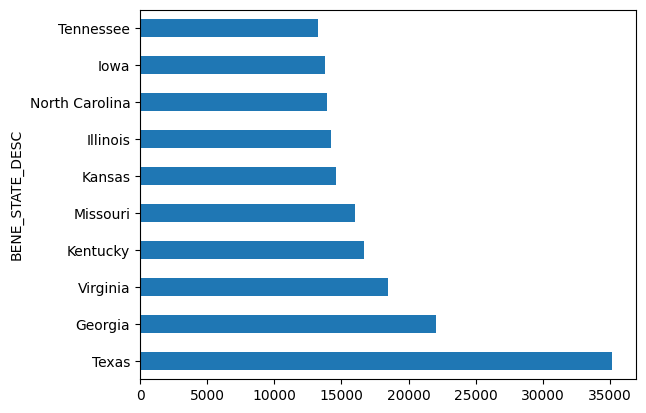

In [ ]:
Topstates=df.groupby('BENE_STATE_DESC')['TOT_BENES'].count().sort_values(ascending=False).head(10).plot(kind='barh')



#Question 2: Which top 10 states had the highest number of all Medicare disabled beneficiaries?

In [ ]:
# This code helps me selects four columns from my DataFrame: DSBLD_TOT_BENES, AGED_TOT_BENES, AGED_NO_ESRD_BENES, and AGED_ESRD_BENES.
# These columns contain the counts of Medicare beneficiaries by different categories, such as disability, age, and ESRD diagnosis1.
# It uses the dtypes attribute to return a pandas Series with the data type of each column. This helps me identify and handle the data types of my DataFrame.
# It uses the unique method to return a numpy array with the unique values of the column AGED_TOT_BENES. Helping me see the range and frequency of the values in this column.
df[['DSBLD_TOT_BENES','AGED_TOT_BENES','AGED_NO_ESRD_BENES','AGED_ESRD_BENES']].dtypes
df['AGED_TOT_BENES'].unique

<bound method Series.unique of 0         43761388
1         698720.0
2           7088.0
3          34162.0
4           4257.0
            ...   
460285       891.0
460286      9097.0
460287           *
460288           *
460289    505424.0
Name: AGED_TOT_BENES, Length: 460290, dtype: object>

In [ ]:
# This code helped me remove all non-numeric characters
# from the DataFrame and made it easier to perform calculations or analysis on the data
# It creates a subset of the DataFrame with only four columns.

#df2=df[df[['DSBLD_TOT_BENES','AGED_TOT_BENES','AGED_NO_ESRD_BENES','AGED_ESRD_BENES']]]
subset_columns = ['DSBLD_TOT_BENES','AGED_TOT_BENES','AGED_NO_ESRD_BENES','AGED_ESRD_BENES']
subset = df[subset_columns]

# Step 2: Clean non-numeric values in the subset
#cleaned_subset = subset.applymap(lambda x: ''.join(char for char in str(x) if char.isdigit() or char == '.'))
cleaned_subset = subset.applymap(lambda x: np.nan if pd.to_numeric(x, errors='coerce') is None else pd.to_numeric(x, errors='coerce'))
# Step 3: Replace the original columns in the DataFrame with the cleaned subset
df[subset_columns] = cleaned_subset.astype(float)

In [ ]:
#Running code to see if it worked , changing data type
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460290 entries, 0 to 460289
Data columns (total 26 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   YEAR                                          460290 non-null  datetime64[ns]
 1   MONTH                                         460290 non-null  object        
 2   BENE_GEO_LVL                                  460290 non-null  object        
 3   BENE_STATE_ABRVTN                             460290 non-null  object        
 4   BENE_STATE_DESC                               460290 non-null  object        
 5   BENE_COUNTY_DESC                              460290 non-null  object        
 6   BENE_FIPS_CD                                  460290 non-null  object        
 7   TOT_BENES                                     452772 non-null  float64       
 8   ORGNL_MDCR_BENES                              460290 n

In [ ]:
# The purpose of this code is to find the top 10 states with the most Medicare beneficiaries who are disabled
# I can use this code to analyze and compare the Medicare enrollment of disabled beneficiaries across
# different states.
Topstates = df[['DSBLD_TOT_BENES','BENE_STATE_DESC']].count().sort_values(ascending=False).head(10)
#print(Topstates)
Topstates.head(10)

BENE_STATE_DESC    460290
DSBLD_TOT_BENES    449807
dtype: int64

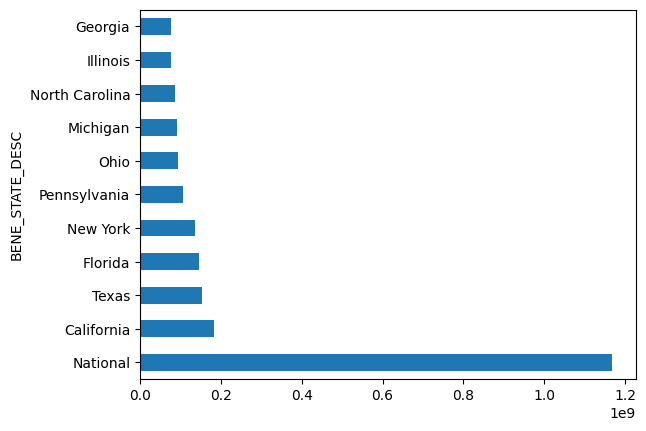

In [ ]:
Top_DSBLD=df.groupby('BENE_STATE_DESC')['DSBLD_TOT_BENES'].sum().sort_values(ascending=False).head(11).plot(kind='barh')

#Question 3: Which top 10 states had the highest number of Medicare aged (65+) beneficiaries?


<Axes: ylabel='BENE_STATE_DESC'>

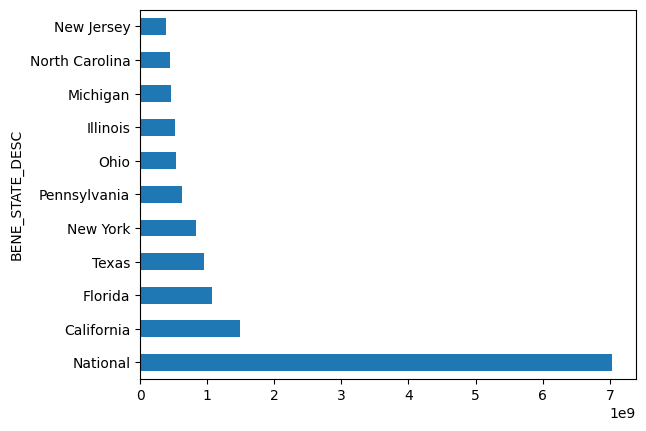

In [ ]:
# I use this code to create a horizontal bar plot of the total number of Medicare beneficiaries who are
# aged by state. I can visualize and compare the Medicare enrollment of aged beneficiaries across different states.
df.groupby('BENE_STATE_DESC')['AGED_TOT_BENES'].sum().sort_values(ascending=False).head(11).plot(kind='barh')


#Question 4: How many Medicare beneficiaries who are 65 or older have End Stage Renal Disease?

In [ ]:
#Variable is Top_ESRD assigned to a subset of df consisting of the 3 columns below
Top_ESRD = df[['BENE_STATE_DESC', 'AGED_NO_ESRD_BENES', 'AGED_ESRD_BENES']]

In [ ]:
# This code groups the data in the Top_ESRD DataFrame by the column BENE_STATE_DESC, which contains the state names.
# It sums the values in the columns AGED_NO_ESRD_BENES and AGED_ESRD_BENES,
# which contain the counts of aged beneficiaries who do not have ESRD and who have ESRD, respectively,
# for each state group.
# It sorts the groups by the sum of AGED_NO_ESRD_BENES in descending order,
# so that the states with the most aged beneficiaries who do not have ESRD are on top.

Top_ESRD.groupby('BENE_STATE_DESC')['AGED_NO_ESRD_BENES','AGED_ESRD_BENES'].sum().sort_values(by='AGED_NO_ESRD_BENES', ascending=False).head(11)

<ipython-input-33-b0fc33b84c37>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Top_ESRD.groupby('BENE_STATE_DESC')['AGED_NO_ESRD_BENES','AGED_ESRD_BENES'].sum().sort_values(by='AGED_NO_ESRD_BENES', ascending=False).head(11)


,AGED_NO_ESRD_BENES,AGED_ESRD_BENES
BENE_STATE_DESC,,
National,7.000763e+09,38817565.0
California,1.475572e+09,10132504.0
Florida,1.059106e+09,5088359.0
Texas,9.286953e+08,6769653.0
New York,8.308787e+08,4931122.0
Pennsylvania,6.246429e+08,3135993.0
Ohio,5.294105e+08,2936855.0
Illinois,5.123547e+08,3276170.0
Michigan,4.550922e+08,2522253.0


<ipython-input-34-06e3529ef1e2>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Top_ESRD.groupby('BENE_STATE_DESC')['AGED_NO_ESRD_BENES','AGED_ESRD_BENES'].sum().sort_values(by='AGED_NO_ESRD_BENES', ascending=False).head(11).plot(kind='bar')


<Axes: xlabel='BENE_STATE_DESC'>

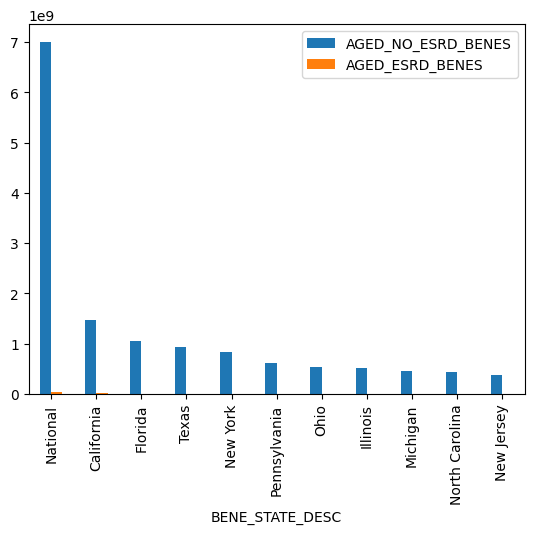

In [ ]:
# The purpose of this code is to create a vertical bar plot of the total number of Medicare beneficiaries
# who are aged and have or do not have end-stage renal disease (ESRD) by state. ESRD is a chronic kidney disease.
Top_ESRD.groupby('BENE_STATE_DESC')['AGED_NO_ESRD_BENES','AGED_ESRD_BENES'].sum().sort_values(by='AGED_NO_ESRD_BENES', ascending=False).head(11).plot(kind='bar')

#Question 5: What trends can be determined from these states regions over time?

In [ ]:
# The purpose of this code is to divide the DataFrame
# into four subsets based on the regions of the United States with Medicare beneficiaries.
# It creates four lists of state abbreviations for each region: Northeast, Midwest, West, and South,
# uses the isin() method to filter the rows of your DataFrame that match the state abbreviations in each list,
# assigns the filtered data to four new variables: Northeast_df, Midwest_df, West_df, and South_df.

Northeast= ['CT', 'DE', 'ME', 'MD', 'MA', 'NH', 'NJ', 'NY', 'PA', 'RI', 'VT']
Midwest= ['IL', 'IN', 'IA', 'KS', 'MI', 'MN', 'MO', 'NE', 'ND', 'OH', 'SD', 'WI']
West= ['AK', 'AZ', 'CA', 'CO', 'HI', 'ID', 'MT', 'NV', 'NM', 'OR', 'UT', 'WA', 'WY']
South= ['AL', 'AR', 'FL', 'GA', 'KY', 'LA', 'MS', 'NC', 'OK', 'SC', 'TN', 'TX', 'VA', 'WV']

Northeast_df = df[df['BENE_STATE_ABRVTN'].isin(Northeast)]
Midwest_df = df[df['BENE_STATE_ABRVTN'].isin(Midwest)]
West_df = df[df['BENE_STATE_ABRVTN'].isin(West)]
South_df = df[df['BENE_STATE_ABRVTN'].isin(South)]


In [ ]:
# I wanted to find out if TOT_BENES was a float
df['TOT_BENES'].dtype

dtype('float64')

In [ ]:
# The purpose of this code is to convert the data type of the two columns in the DataFrame: YEAR and TOT_BENES
# It uses the pd.to_datetime() function to convert the YEAR column to a datetime object,
# using the format parameter to specify that the year is in four-digit format.
# It uses the pd.to_numeric() function to convert the TOT_BENES column to a numeric object,
# using the errors parameter to set any invalid values to NaN
df['YEAR'] = pd.to_datetime(df['YEAR'], format='%Y')
df['TOT_BENES']= pd.to_numeric(df['TOT_BENES'],errors='coerce')

Axes(0.125,0.11;0.775x0.77)


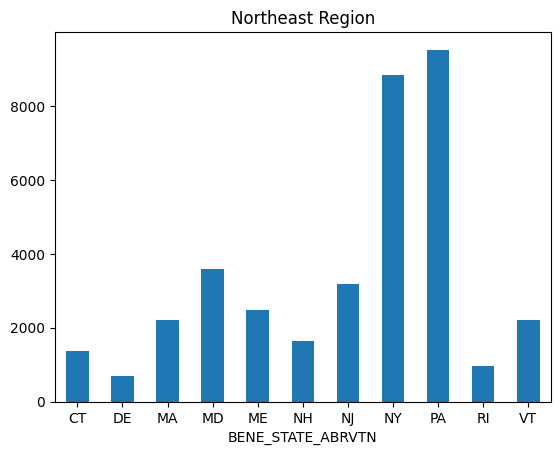

In [ ]:
# The purpose of this code is to create a vertical bar plot of
# the total number of Medicare beneficiaries by state in the Northeast region.
Northeast=Northeast_df.groupby('BENE_STATE_ABRVTN')['TOT_BENES'].size().plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Northeast Region')
print (Northeast)

In [ ]:
#  Calculated the total number of Medicare beneficiaries in Northeast region
Northeast=Northeast_df.groupby('BENE_STATE_ABRVTN')['TOT_BENES'].sum()

Axes(0.125,0.11;0.775x0.77)


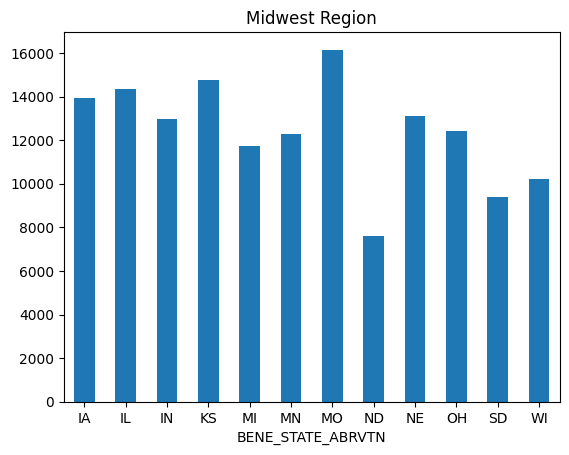

In [ ]:
#The purpose of this code is to create a vertical bar plot of the total number
# of Medicare beneficiaries by state in the Midwest region.
Midwest=Midwest_df.groupby('BENE_STATE_ABRVTN')['TOT_BENES'].size().plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Midwest Region')
print (Midwest)

In [ ]:
#   Calculated the total number of Medicare beneficiaries in Midwest region
Midwest=Midwest_df.groupby('BENE_STATE_ABRVTN')['TOT_BENES'].sum()

Axes(0.125,0.11;0.775x0.77)


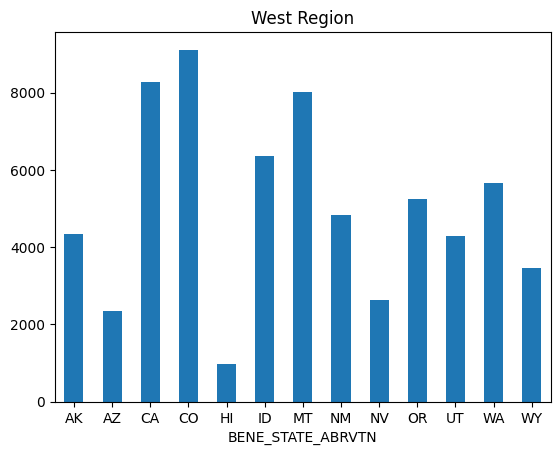

In [ ]:
# The purpose of this code is to create a vertical bar plot of the total number
# of Medicare beneficiaries by state in the West region.
West=West_df.groupby('BENE_STATE_ABRVTN')['TOT_BENES'].size().plot(kind='bar')
plt.xticks(rotation=0)
plt.title('West Region')
print (West)

In [ ]:
#  Calculated the total number of Medicare beneficiaries in West region
West=West_df.groupby('BENE_STATE_ABRVTN')['TOT_BENES'].sum()

Axes(0.125,0.11;0.775x0.77)


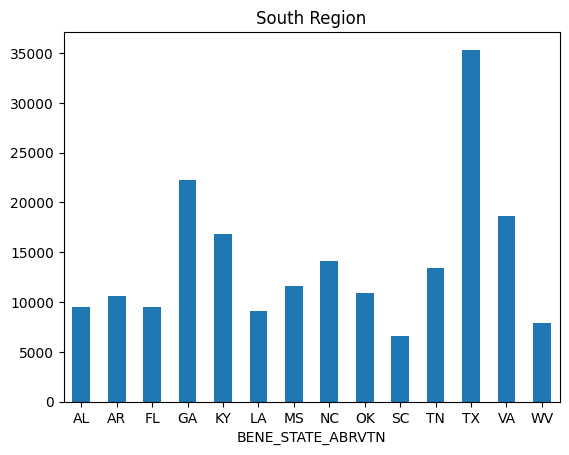

In [ ]:
# The purpose of this code is to create a vertical bar plot of the total number
# of Medicare beneficiaries by state in the South region.
South=South_df.groupby('BENE_STATE_ABRVTN')['TOT_BENES'].size().plot(kind='bar')
plt.xticks(rotation=0)
plt.title('South Region')
print (South)

In [ ]:
#  Calculated the total number of Medicare beneficiaries in South region
South=South_df.groupby('BENE_STATE_ABRVTN')['TOT_BENES'].sum()

Conclusion: Enrollment trends by state vary over time. Some states, such as California, Florida, and Texas, have increasing trends, meaning that their enrollment numbers grow over time. Other states, such as New York, Pennsylvania, and Ohio, have decreasing trends, meaning that their enrollment numbers decline over time. Some states, such as Illinois, Michigan, and Georgia, have constant trends, meaning that their enrollment numbers stay relatively stable over time. There are also some outliers, such as the spike in enrollment for New Jersey in March 2023, or the drop in enrollment for Massachusetts in June 2023, which might indicate some special events or factors affecting those states.